## Machine Learning Algorithms 2023
## Homework 2: K Nearest Neighbors (KNN) algorithm (80 points)


Name: Conrad, Christian-Ray

Email: conrchri@kean.edu

Kean ID: 001126666

Course: CPS 4802 - 01


This homework aims to enhace your understanding of the KNN algorithm using the wine recognition dataset.
### Run each cell and save the results in Google Colab Notebook before submission. You will not get points without saving your results.

# Note, because of the randomness, your results might not be exactly the same as the sample outputs!

Tasks:

[Task 1](#section1) (20 points)

[Task 2](#section2) (20 points)

[Task 3](#section3) (20 points)

[Task 4](#section4) (10 points)

[Task 5](#section5) (10 points)

[Extra points](#section6) (10 points)

## Dataset

    - Number of data samples: 178
    
    - Each data sample has 13 numeric features/attributes.
    
    - Class labels
        - class_0: 59
        - class_1: 71
        - class_2: 48
        
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import sklearn.datasets as ds
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

### Task 1: Implementation of the KNN algorithm.  20 points <a id = "section1"/>
We will use KNN to classify the wine recognition dataset. Please use all 13 features in task 1 to task 4 and test dataset size is 20% of the total dataset.

There are two parts in this task:
  1. Implement the KNN algorithm. Type following the notebook of lecture 7. DO NOT copy and paste. Type it by yourself and understand the KNN algorithm. (10 points)
    
  2. Use MyKNN() to classify the wine recognition dataset. Use K = 5. Your program should have four parts: a. data preparation, test_size=0.2, b. model training, c. prediction and evaluation on the test data set using confusion matrix, accuracy and error rate, d. using joblib to save the model. (10 points)

In [6]:
# 1. type MyKNN class here
class MyKNN:
    def __init__(self, k = 5):
        self.K = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train


    def predict(self, X):
        n = X.shape[0]
        pred = np.zeros(n, dtype = int)

        for i in range(n):
            nns = self.findKNgbs(X[i, :])
            labels = self.y_train[nns]
            cnts = np.bincount(labels)
            pred[i] = np.argmax(cnts)

        return pred

    def findKNgbs(self, x):
        distance = np.sqrt(np.sum((self.x_train - x) ** 2, axis=1))
        index = np.argsort(distance)

        return index[:self.K]



    def errRate(self, real, pred, precison = 2):
        err = 0
        n = real.shape[0]
        err = np.sum(real != pred)
        return round(err/n, precison)

In [8]:
# 2. Use MyKNN() to classify the wine recognition dataset. Use K = 5.
# Step 1: data preparation
wine = ds.load_wine()
X = wine.data # features: 178*13
y = wine.target # class labels: 0,1,2

# ------------------ Add your code here -------------------
# Split the dataset into training and test datasets test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Step 2: model training
# ------------------ Add your code here -------------------
knn = MyKNN(k=5)
knn.fit(x_train, y_train)

# Step 3: prediction and evaluation on the test using confusion matrix, accuracy, and error rate
# ------------------ Add your code here -------------------
from sklearn.metrics import confusion_matrix as confuse
train_predict = knn.predict(x_train)
test_predict = knn.predict(x_test)

mat = confuse(y_train, train_predict)
print(mat)

[[41  1  5]
 [ 4 38 12]
 [ 1 13 27]]


In [9]:
# Step 4: save model
# ------------------ Add your code here -------------------
import joblib
joblib.dump(knn, "knn.joblib")

['knn.joblib']

### Task 2: Finding the best parameter(K).  20 points <a id = "section2"/>
  - Split the previous training dataset (X_train, y_train) into new train dataset and validation dataset. test_size = 0.1
  - Try different k values: k = 1, 3, 5, 7, 9. Print error rates on the training and testing sets for each K value. (10 points).
  - Plot error rates for k = 1, 3, 5, 7, 9 using matplotlib in one figure.(10 points)

In [11]:
# 1. Split the old training dataset into train_new and validation datasets, test_size = 0.1
import time

X_train_val, X_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [13]:
# 2. parameter selection
# ------------------ Add your code here -------------------
errorRt = []
for k in range(1, 10):
    knn2 = MyKNN(k)
    knn2.fit(X_train_val, y_train_val)
    train_pred = knn2.predict(X_train_val)
    print(k, 'Error rate on training set:{}%'.format(100*knn2.errRate(y_train_val, train_pred)))
    errorRt.append(100*knn2.errRate(y_train_val, train_pred))

    val_pred = knn2.predict(X_val)
    print(k, 'Error rate on val set:{}%'.format(100*knn2.errRate(y_val, val_pred)))
    errorRt.append(100*knn2.errRate(y_val, val_pred))

1 Error rate on training set:0.0%
1 Error rate on val set:53.0%
2 Error rate on training set:13.0%
2 Error rate on val set:73.0%
3 Error rate on training set:14.000000000000002%
3 Error rate on val set:60.0%
4 Error rate on training set:19.0%
4 Error rate on val set:67.0%
5 Error rate on training set:24.0%
5 Error rate on val set:60.0%
6 Error rate on training set:20.0%
6 Error rate on val set:80.0%
7 Error rate on training set:21.0%
7 Error rate on val set:73.0%
8 Error rate on training set:20.0%
8 Error rate on val set:80.0%
9 Error rate on training set:23.0%
9 Error rate on val set:67.0%


<function matplotlib.pyplot.show(close=None, block=None)>

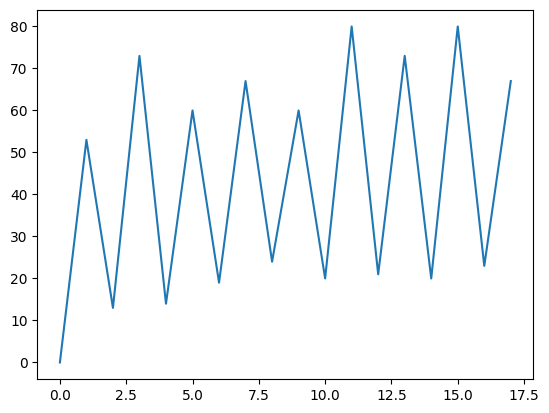

In [14]:
# 3. Plot the TESTING error rates using different K values in one figure
# Hint: Save the testing error rates in a list before ploting
# Hint: https://www.w3schools.com/python/matplotlib_pyplot.asp

import matplotlib.pyplot as plt
# ------------------ Add your code here -------------------
plt.plot(errorRt)
plt.show

### Task 3: Model Evaluation and Selection Essay Questions. 20 points, 5 each <a id = "section3"/>
  
Please answer the following questions in the following cell. Write down your answers using Python commands.
- Question 1: What is overfitting and underfitting and how do we know if a model is overfitting or underfitting?

- Question 2: Please explain what are the differences between precision rate and recall rate in a 2-class classification task.

- Question 3: Please explain what is k-fold cross-validation and why we need it.

- Question 4: Imagine you have an email system that attempts to filter out spam emails. You work in a company's IT department and are responsible for deveploing a AI model for filtering spam emails. Which evaluation metric will you select? Precision rate and recall rate?




In [ ]:
# Answer for Question 1

# Underfitting is when a model performs poorly on training data and is unable to
# generalize new data. Overfitting is when a model performs exceptionally well
# on training data to the point where it fails at fitting new data. We can determine
# if a model is underfitting or overfitting using various validation methods.


# Answer for Question 2

# Precision rate is defined as the number of true positives/predicted positives
# (Predicted positives = true positive + false positive)

# Recall rate is defined as the number of true positives/real positives
# (Real positives = true positives + false negatives)


# Answer for Question 3

# K-fold CV is when the dataset is split into a K number of folds and is used to
# evaluate the model's ability when given new data. k-fold CV is used for helping
# to mitigate the risk of overfitting and provides a more reliable assessment of
# how well the model is expected to perform on unseen data


# Answer for Question 4

#

### Task 4: Use KNN in sklearn.  10 points <a id = "section4"/>
Use KNN in sklearn to classify the wine recognition dataset again. Use k = 5. Print the error rate on the old training and testing set in Task 1.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# ------------------ Add your code here -------------------
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Print the error rate on both the training and testing set
# ------------------ Add your code here -------------------
train_pred = neigh.predict(x_train)
print("Error rate on training set: {}%".format(100*(1-accuracy_score(y_train, train_pred))))

test_pred = neigh.predict(x_test)
print("Error rate on test set: {}%".format(100*(1-accuracy_score(y_test, test_pred))))

Error rate on training set: 14.7887323943662%
Error rate on test set: 19.444444444444443%


### Task 5: Investigate the influence of using different numbers of features.  10 points <a id = "section5"/>

In the above tasks, we used all of the provided 13 feature attributes for KNN. What if we use partial of these attributes? The optimal value of K may be different when we select different attributes. To simplify this task, let's fix K = 5. Please do the following four cases</br>

    - Use only the first feature for KNN using K = 5.
    - Use the first 5 features for KNN using K = 5.
    - Use the first 10 features for KNN using K = 5.
    - Use all 13 features for KNN using K = 5.
    
Plot the testing errors of the above four cases in one figure. Fix the training set and test set for a fair comparison. That means you should split the training and testing set once instead of four times. </br>


Hint: To get the first 5 features, do X_train[:, 0:5]

In [23]:
# ------------------ Add your code here -------------------
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 5)

feature_sets = [1, 5, 10, 13]
train_err = []
test_err = []

for num_feat in feature_sets:
  x_train_subset = x_train[:, :num_feat]
  x_test_subset = x_test[:, :num_feat]

  model.fit(x_train_subset, y_train)

  y_train_pred = model.predict(x_train_subset)
  y_test_pred = model.predict(x_test_subset)

  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)

  train_err.append(1-train_acc)
  test_err.append(1-test_acc)

  print(f"{num_feat} Error rate on training set: {(1-train_acc) * 100: .2f}%")
  print(f"{num_feat} Error rate on test set: {(1-test_acc) * 100: .2f}%")

1 Error rate on training set:  25.35%
1 Error rate on test set:  27.78%
5 Error rate on training set:  18.31%
5 Error rate on test set:  27.78%
10 Error rate on training set:  10.56%
10 Error rate on test set:  13.89%
13 Error rate on training set:  25.35%
13 Error rate on test set:  25.00%


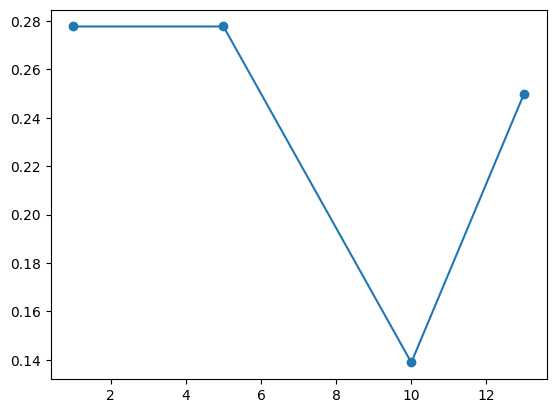

In [24]:
# ------------------ Add your code here -------------------
plt.plot(feature_sets, test_err, marker = 'o')
plt.show()

### Extra points: Find the best performance case 10 points  <a id = "section6"/>

Based on the results in task 5, using all 13 features might not get the best results. In this task, we are going to find the best performance situation. You can select any number of features, and you can select any k for KNN. If you can find a case where the error rate on the test set is smaller than 11%, you can get 10 extra points.

1 Error rate on test set:36.111111111111114%
1 Error rate on test set:13.888888888888884%
1 Error rate on test set:22.22222222222222%
1 Error rate on test set:13.888888888888884%
1 Error rate on test set:33.333333333333336%
1 Error rate on test set:25.0%
1 Error rate on test set:25.0%
1 Error rate on test set:22.22222222222222%
1 Error rate on test set:25.0%
1 Error rate on test set:19.444444444444443%
1 Error rate on test set:19.444444444444443%
1 Error rate on test set:11.111111111111116%
1 Error rate on test set:47.22222222222222%
1 Error rate on test set:19.444444444444443%
1 Error rate on test set:36.111111111111114%
1 Error rate on test set:30.555555555555557%
1 Error rate on test set:27.77777777777778%
1 Error rate on test set:27.77777777777778%
1 Error rate on test set:27.77777777777778%
1 Error rate on test set:19.444444444444443%
1 Error rate on test set:19.444444444444443%
1 Error rate on test set:13.888888888888884%
1 Error rate on test set:22.22222222222222%
1 Error rate o

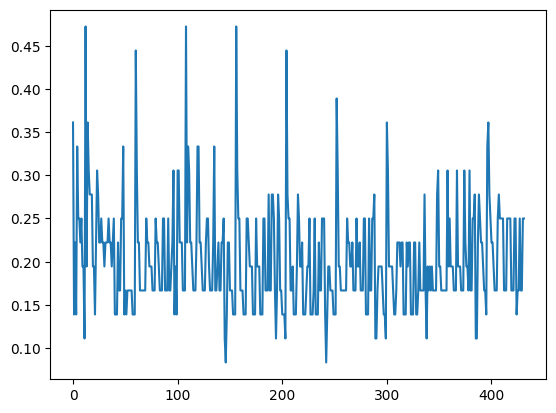

In [ ]:
# ------------------ Add your code here -------------------
